In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
#

In [254]:
def import_data(path):
    df = pd.read_csv(path)
    return df

In [255]:
def plot(df_x, df_y, title, x, y):
    plt.figure(figsize=(10, 5))
    plt.plot(df_x, df_y)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.show()

## IMPORTACION

### PREPARACION

In [256]:
df = pd.read_csv('IMPORTACION.csv')
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.set_index('Fecha', inplace=True)
df

,Diesel,GLP,Regular,Super
Fecha,,,,
2001-01-01,0.00,194065.738095,177776.50,373963.96
2001-02-01,0.00,170703.380952,123115.99,243091.07
2001-03-01,0.00,161837.371429,161726.42,312084.38
2001-04-01,0.00,163048.642857,127338.74,285054.89
2001-05-01,0.00,171518.861905,168730.19,300913.67
...,...,...,...,...
2024-01-01,1409097.15,701570.800000,914133.32,712333.33
2024-02-01,1236861.75,916541.700000,740662.25,650360.11
2024-03-01,1477038.00,675157.480000,838270.93,620077.74


In [257]:
# Remove all rows where Diesel value is 0
df = df[df['Diesel'] != 0]
df

,Diesel,GLP,Regular,Super
Fecha,,,,
2018-01-01,1153831.89,396363.050000,571858.06,535784.70
2018-02-01,921684.12,591000.020476,509366.10,629467.91
2018-03-01,889227.10,644245.403333,563899.06,529507.15
2018-04-01,696962.77,188590.813333,510830.00,617512.28
2018-05-01,1592580.34,636234.130952,580825.11,580329.35
...,...,...,...,...
2024-01-01,1409097.15,701570.800000,914133.32,712333.33
2024-02-01,1236861.75,916541.700000,740662.25,650360.11
2024-03-01,1477038.00,675157.480000,838270.93,620077.74


### REGULAR

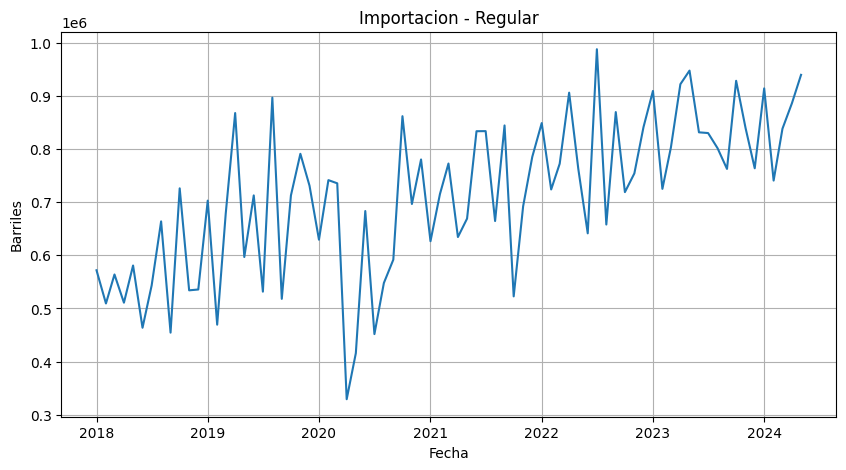

In [258]:
title = 'Importacion - Regular'
xlabel = 'Fecha'
ylabel = 'Barriles'
plot(df.index, df['Regular'], title, xlabel, ylabel)

### SUPER

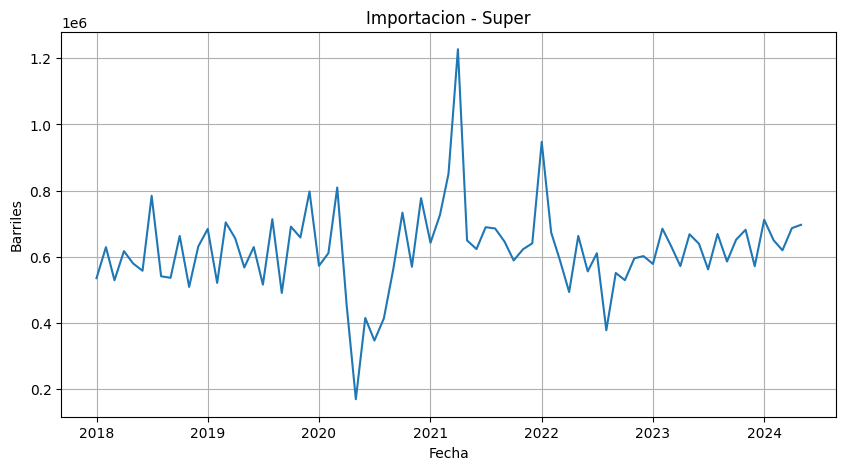

In [259]:
title = 'Importacion - Super'
xlabel = 'Fecha'
ylabel = 'Barriles'
plot(df.index, df['Super'], title, xlabel, ylabel)

### DIESEL

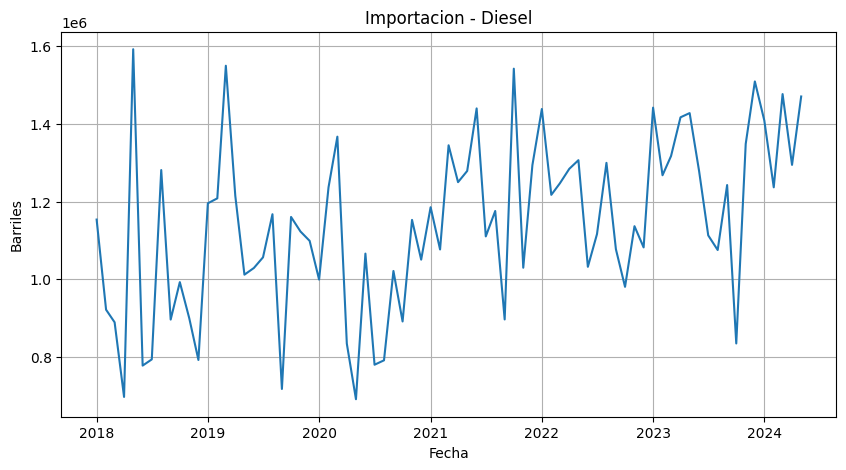

In [260]:
title = 'Importacion - Diesel'
xlabel = 'Fecha'
ylabel = 'Barriles'
plot(df.index, df['Diesel'], title, xlabel, ylabel)

### GLP

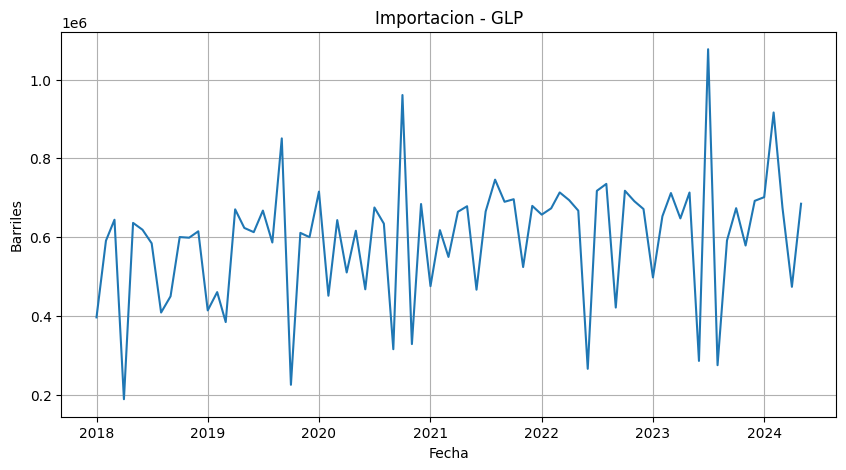

In [261]:
title = 'Importacion - GLP'
xlabel = 'Fecha'
ylabel = 'Barriles'
plot(df.index, df['GLP'], title, xlabel, ylabel)

### OTROS

In [262]:
# Calcular la correlación
correlation_matrix = df[['GLP', 'Regular', 'Super', 'Diesel']].corr()
correlation_matrix

,GLP,Regular,Super,Diesel
GLP,1.000000,0.200095,0.041647,0.028092
Regular,0.200095,1.000000,0.382864,0.520631
Super,0.041647,0.382864,1.000000,0.340075
Diesel,0.028092,0.520631,0.340075,1.000000


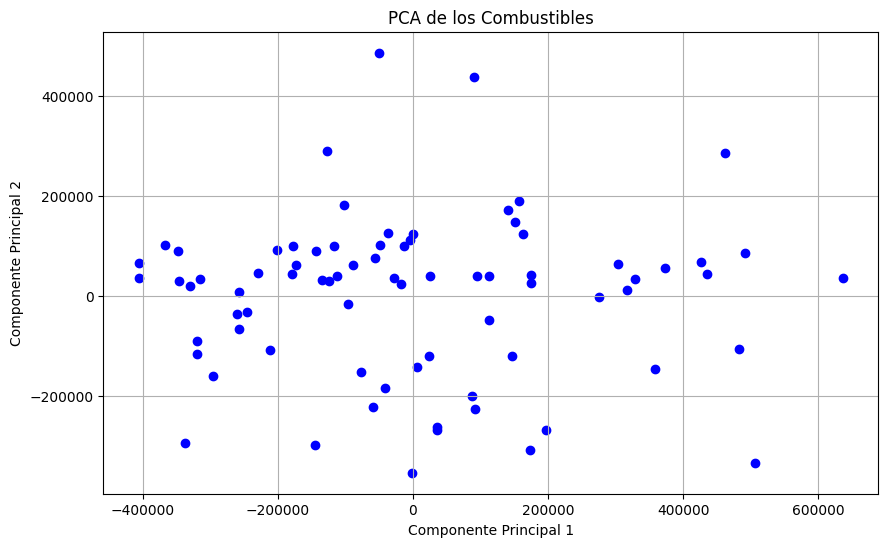

In [263]:
combustibles = df[['GLP', 'Regular', 'Super', 'Diesel']]

# Aplicar PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(combustibles)

# Crear un DataFrame con los resultados de PCA
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Fecha'] = df.index

# Visualizar los componentes principales
plt.figure(figsize=(10,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue')
plt.title('PCA de los Combustibles')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

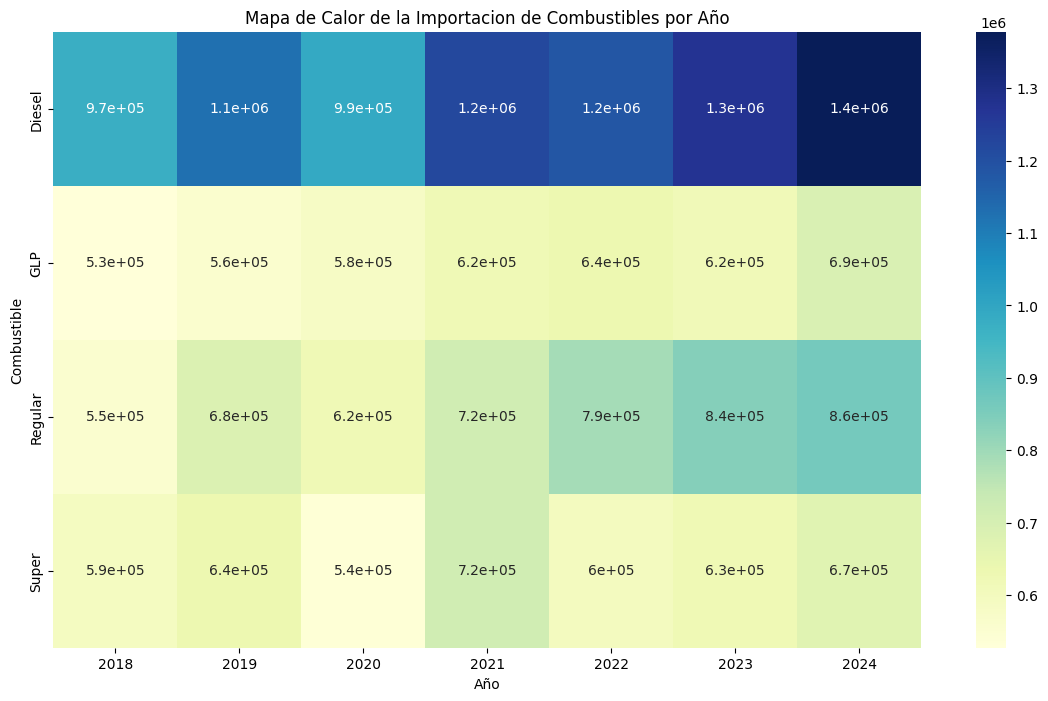

In [264]:
# Agrupar por año y calcular la media
df['Año'] = df.index.year
df_anual = df.groupby('Año').mean()

# Mapa de Calor
heatmap_data = df_anual.T

plt.figure(figsize=(14,8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, cbar=True)
plt.title('Mapa de Calor de la Importacion de Combustibles por Año')
plt.xlabel('Año')
plt.ylabel('Combustible')
plt.show()

## CONSUMO

### PREPARACION

In [265]:
df = pd.read_csv('CONSUMO.csv')
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.set_index('Fecha', inplace=True)
# Remove all rows where Diesel value is 0
df = df[df['Diesel'] != 0]
df

,Diesel,GLP,Regular,Super
Fecha,,,,
2018-01-01,1105628.890,421848.920476,528763.30,581802.98
2018-02-01,1072071.670,379239.067143,502041.67,545210.00
2018-03-01,1194136.180,415125.896429,571052.13,618402.18
2018-04-01,1108452.970,370434.605238,526979.67,565665.72
2018-05-01,1009750.145,403094.744048,544395.17,570129.66
...,...,...,...,...
2024-01-01,1359012.490,548124.450000,830708.13,658083.66
2024-02-01,1340174.420,526897.850000,818740.16,654059.60
2024-03-01,1393324.520,523990.910000,870771.70,671997.05


### REGULAR

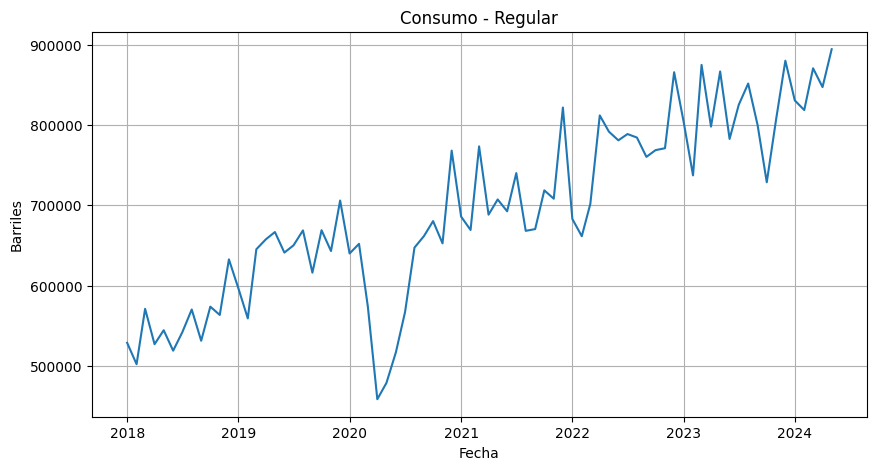

In [266]:
title = 'Consumo - Regular'
xlabel = 'Fecha'
ylabel = 'Barriles'
plot(df.index, df['Regular'], title, xlabel, ylabel)

### SUPER

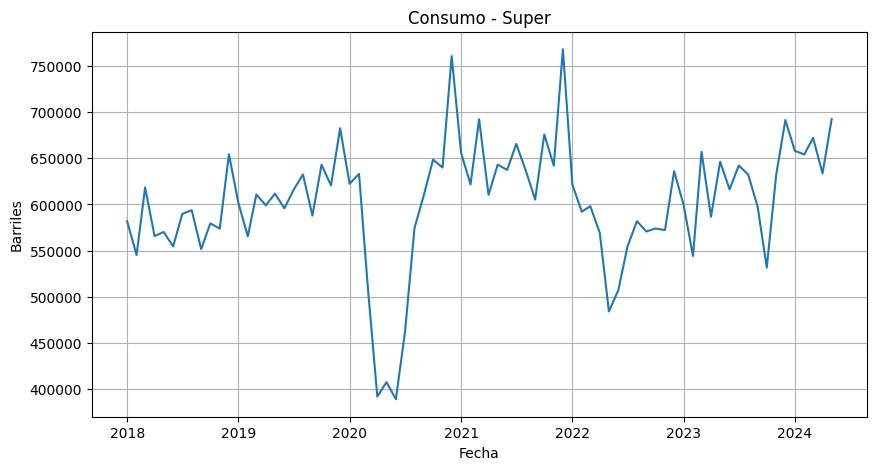

In [267]:
title = 'Consumo - Super'
xlabel = 'Fecha'
ylabel = 'Barriles'
plot(df.index, df['Super'], title, xlabel, ylabel)

### DIESEL

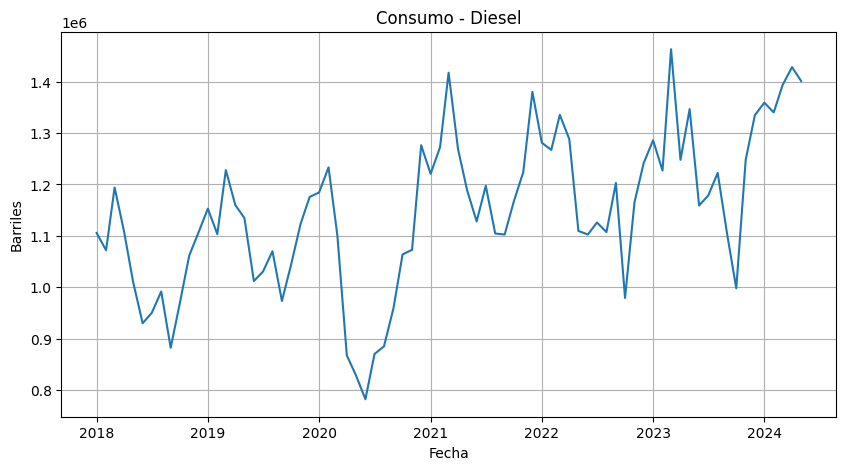

In [268]:
title = 'Consumo - Diesel'
xlabel = 'Fecha'
ylabel = 'Barriles'
plot(df.index, df['Diesel'], title, xlabel, ylabel)

### GLP

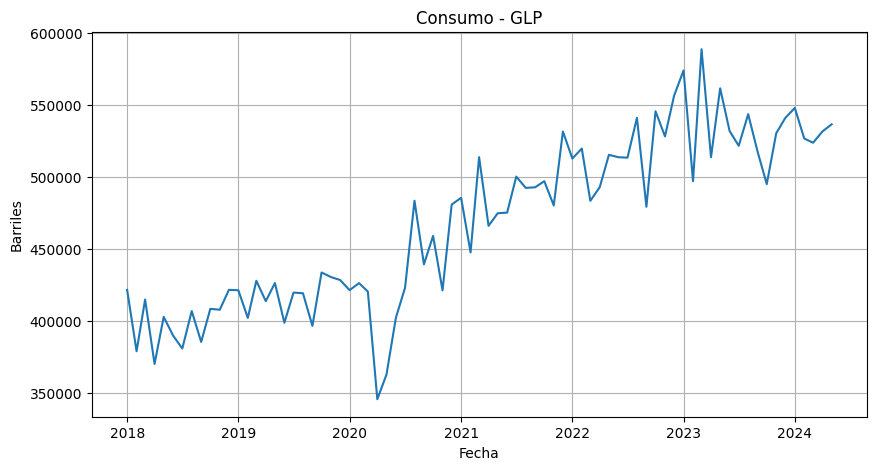

In [269]:
title = 'Consumo - GLP'
xlabel = 'Fecha'
ylabel = 'Barriles'
plot(df.index, df['GLP'], title, xlabel, ylabel)

### OTROS

In [270]:
# Calcular la correlación
correlation_matrix = df[['GLP', 'Regular', 'Super', 'Diesel']].corr()
correlation_matrix

,GLP,Regular,Super,Diesel
GLP,1.000000,0.922080,0.431916,0.677647
Regular,0.922080,1.000000,0.543722,0.735883
Super,0.431916,0.543722,1.000000,0.677832
Diesel,0.677647,0.735883,0.677832,1.000000


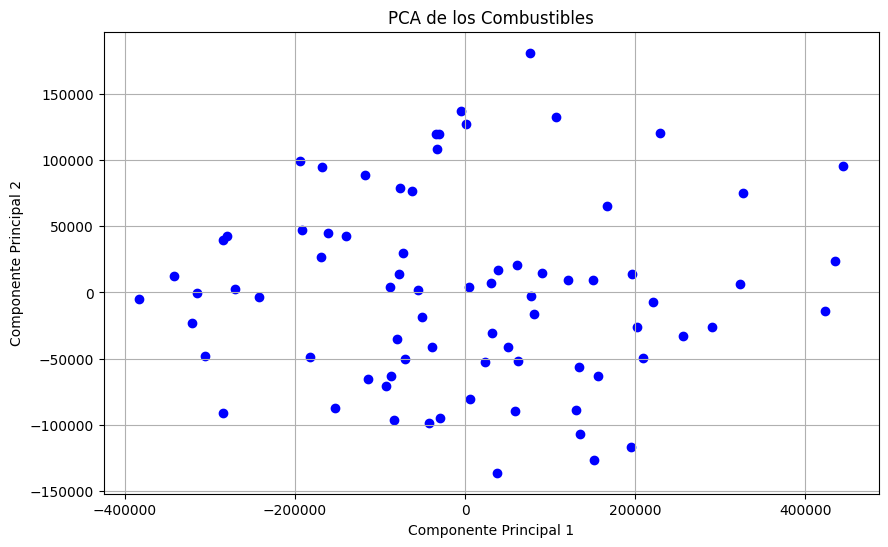

In [271]:
combustibles = df[['GLP', 'Regular', 'Super', 'Diesel']]

# Aplicar PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(combustibles)

# Crear un DataFrame con los resultados de PCA
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Fecha'] = df.index

# Visualizar los componentes principales
plt.figure(figsize=(10,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue')
plt.title('PCA de los Combustibles')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

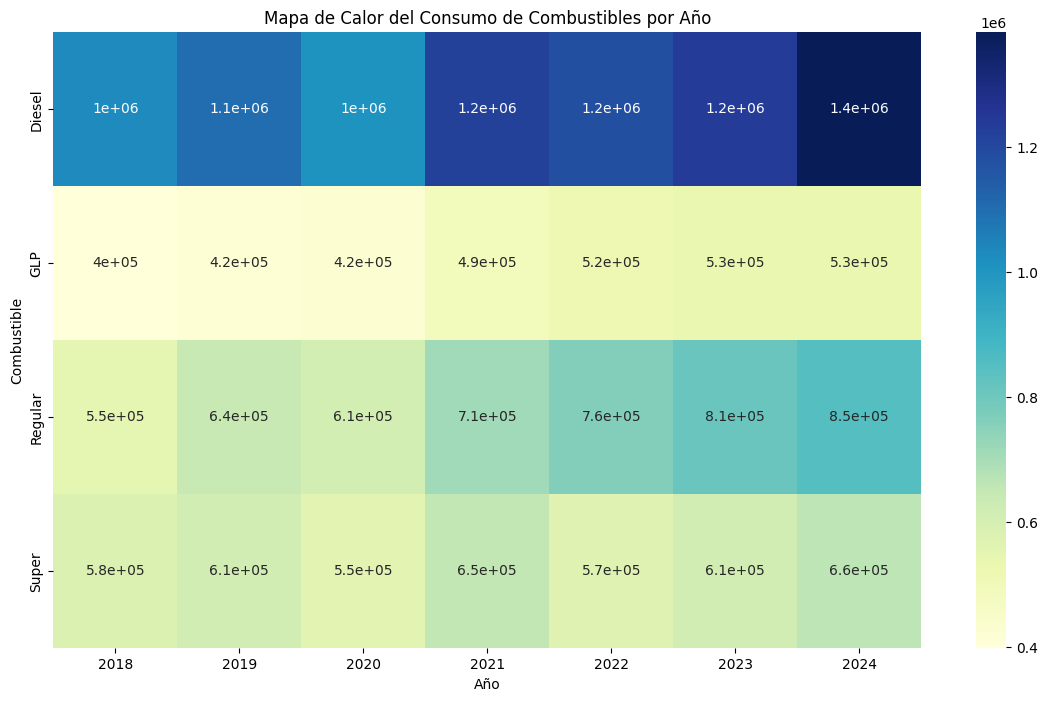

In [272]:
# Agrupar por año y calcular la media
df['Año'] = df.index.year
df_anual = df.groupby('Año').mean()

# Mapa de Calor
heatmap_data = df_anual.T

plt.figure(figsize=(14,8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, cbar=True)
plt.title('Mapa de Calor del Consumo de Combustibles por Año')
plt.xlabel('Año')
plt.ylabel('Combustible')
plt.show()

## PRECIOS

### PREPARACION

In [273]:
df = pd.read_csv('PRECIOS.csv')
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.set_index('Fecha', inplace=True)
df = df.dropna()
df

,Regular,Super,Diesel
Fecha,,,
2002-01-01,12.19,12.55,8.95
2002-02-01,11.90,12.29,8.66
2002-03-01,12.17,12.58,8.69
2002-04-01,13.71,14.11,9.38
2002-05-01,13.79,14.16,9.44
...,...,...,...
2024-01-01,29.12,30.62,29.16
2024-02-01,30.34,31.84,30.72
2024-03-01,32.43,33.93,29.97


### Regular

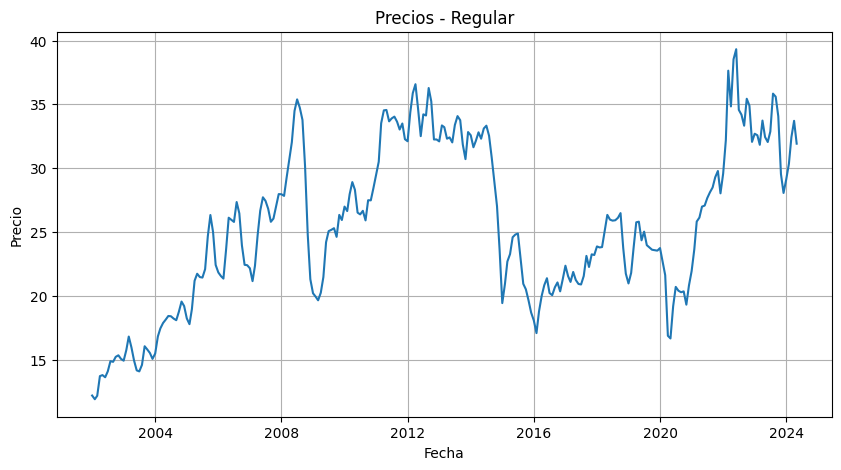

In [274]:
title = 'Precios - Regular'
xlabel = 'Fecha'
ylabel = 'Precio'
plot(df.index, df['Regular'], title, xlabel, ylabel)

### SUPER

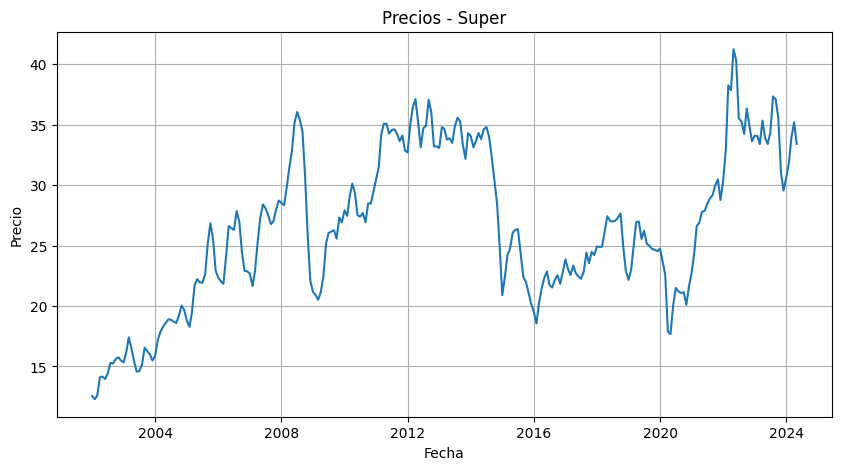

In [275]:
title = 'Precios - Super'
xlabel = 'Fecha'
ylabel = 'Precio'
plot(df.index, df['Super'], title, xlabel, ylabel)

### DIESEL

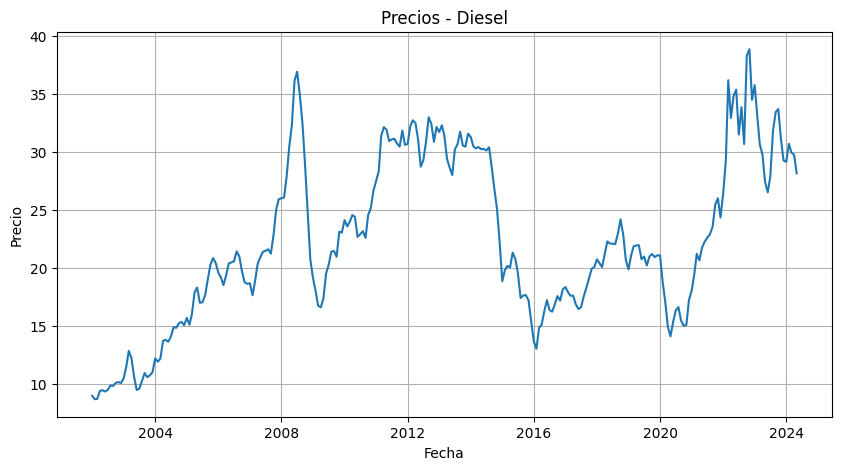

In [276]:
title = 'Precios - Diesel'
xlabel = 'Fecha'
ylabel = 'Precio'
plot(df.index, df['Diesel'], title, xlabel, ylabel)

### OTROS

In [277]:
# Calcular la correlación
correlation_matrix = df[['Regular', 'Super', 'Diesel']].corr()
correlation_matrix

,Regular,Super,Diesel
Regular,1.000000,0.997968,0.976743
Super,0.997968,1.000000,0.976214
Diesel,0.976743,0.976214,1.000000


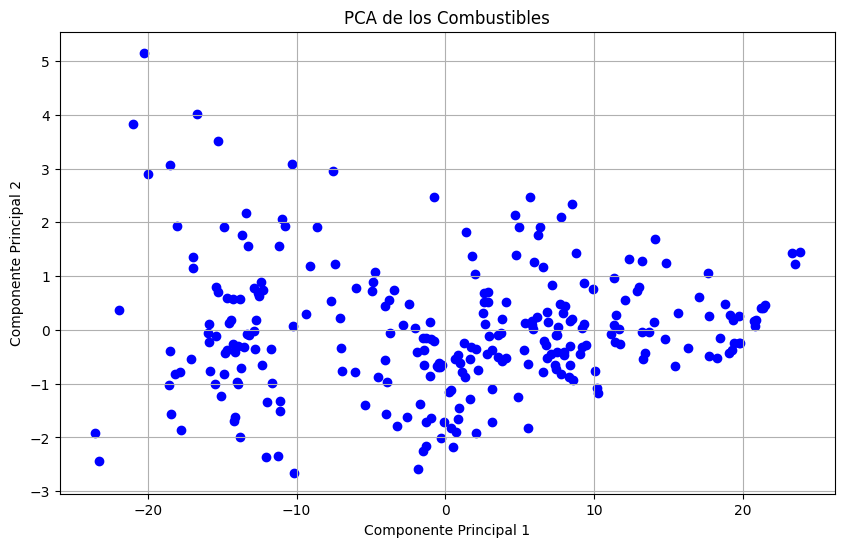

In [278]:
combustibles = df[['Regular', 'Super', 'Diesel']]

# Aplicar PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(combustibles)

# Crear un DataFrame con los resultados de PCA
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Fecha'] = df.index

# Visualizar los componentes principales
plt.figure(figsize=(10,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue')
plt.title('PCA de los Combustibles')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

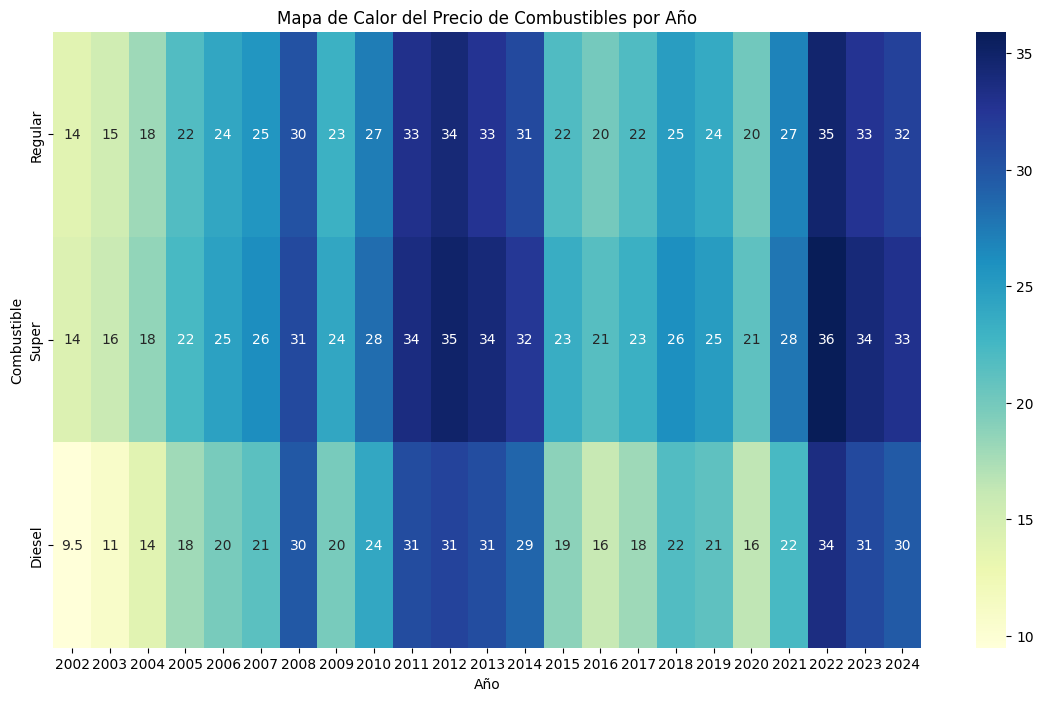

In [279]:
# Agrupar por año y calcular la media
df['Año'] = df.index.year
df_anual = df.groupby('Año').mean()

# Mapa de Calor
heatmap_data = df_anual.T

plt.figure(figsize=(14,8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, cbar=True)
plt.title('Mapa de Calor del Precio de Combustibles por Año')
plt.xlabel('Año')
plt.ylabel('Combustible')
plt.show()